Problem 1: Clustering

A leading bank wants to develop a customer segmentation to give promotional offers to its customers. They collected a sample that summarizes the activities of users during the past few months. You are given the task to identify the segments based on credit card usage.



In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats

In [74]:
df1 = pd.read_csv('bank_marketing_part1_Data.csv')

1.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).



In [76]:
df1.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [77]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [78]:
df1.dtypes

spending                        float64
advance_payments                float64
probability_of_full_payment     float64
current_balance                 float64
credit_limit                    float64
min_payment_amt                 float64
max_spent_in_single_shopping    float64
dtype: object

In [79]:
df1.shape

(210, 7)

In [80]:
df1.isnull().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

In [81]:
df1.describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


In [82]:
df1.duplicated().sum()

0

Univariate Analysis

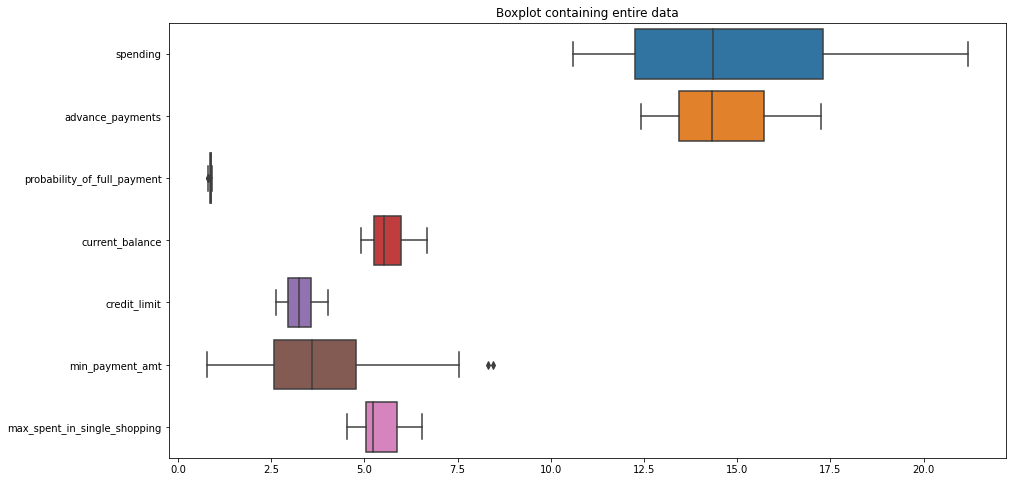

In [84]:
plt.figure(figsize=(15,8))
plt.title("Boxplot containing entire data")
sns.boxplot(data=df1,orient="h");

In [85]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df1[column].describe(),end=' ')
    
    
    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.distplot(df1[column], kde=True);
    plt.title("Distribution of " + column,fontsize=10)
    plt.show()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=df1[column], orient = "v")
    plt.title("Boxplot of " + column,fontsize=10)
    plt.show()
    
    plt.figure()
    print("Histogram of " + column)
    print("----------------------------------------------------------------------------")
    ax1 = plt.hist(x=df1[column])
    plt.title("Histogram of " + column,fontsize=10)
    plt.xlabel("" + column, fontsize=10)
    plt.show()

In [86]:
df1_num = df1.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns1 = list(df1_num.columns.values)
len(lstnumericcolumns1)

7

In [87]:
df1_num.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [88]:
df1.skew(axis = 0, skipna = True).sort_values(ascending=False)

max_spent_in_single_shopping    0.561897
current_balance                 0.525482
min_payment_amt                 0.401667
spending                        0.399889
advance_payments                0.386573
credit_limit                    0.134378
probability_of_full_payment    -0.537954
dtype: float64

In [89]:
Skewness_1 = pd.DataFrame({'Skewness' : [stats.skew(df1.spending),stats.skew(df1.advance_payments),stats.skew(df1.probability_of_full_payment),stats.skew(df1.current_balance),stats.skew(df1.credit_limit),stats.skew(df1.min_payment_amt),stats.skew(df1.max_spent_in_single_shopping)]},
                        index=['spending','advance_payments','probability_of_full_payment','current_balance','credit_limit','min_payment_amt','max_spent_in_single_shopping']) 

In [90]:
Skewness_1

,Skewness
spending,0.397027
advance_payments,0.383806
probability_of_full_payment,-0.534104
current_balance,0.521721
credit_limit,0.133416
min_payment_amt,0.398793
max_spent_in_single_shopping,0.557876


Description of spending
----------------------------------------------------------------------------
count    210.000000
mean      14.847524
std        2.909699
min       10.590000
25%       12.270000
50%       14.355000
75%       17.305000
max       21.180000
Name: spending, dtype: float64 Distribution of spending
----------------------------------------------------------------------------


C:\Users\Athulya\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


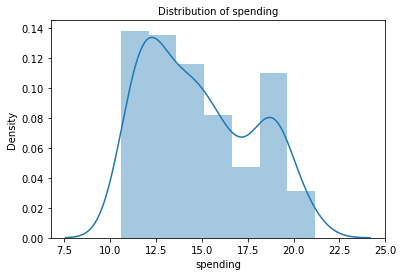

BoxPlot of spending
----------------------------------------------------------------------------


C:\Users\Athulya\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


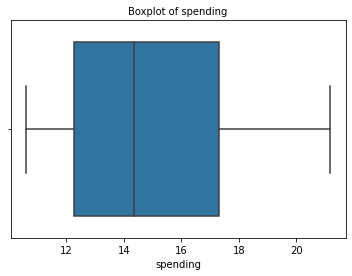

Histogram of spending
----------------------------------------------------------------------------


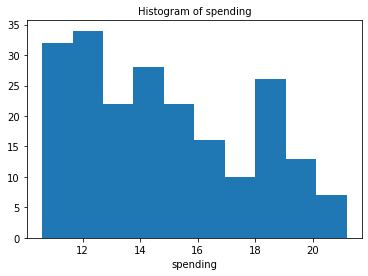

C:\Users\Athulya\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Description of advance_payments
----------------------------------------------------------------------------
count    210.000000
mean      14.559286
std        1.305959
min       12.410000
25%       13.450000
50%       14.320000
75%       15.715000
max       17.250000
Name: advance_payments, dtype: float64 Distribution of advance_payments
----------------------------------------------------------------------------


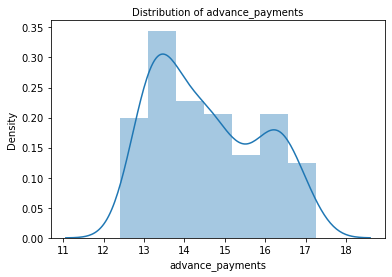

BoxPlot of advance_payments
----------------------------------------------------------------------------


C:\Users\Athulya\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


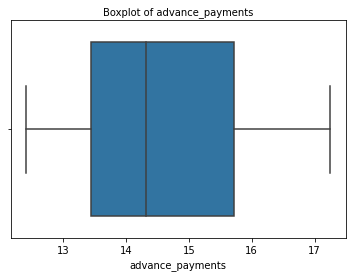

Histogram of advance_payments
----------------------------------------------------------------------------


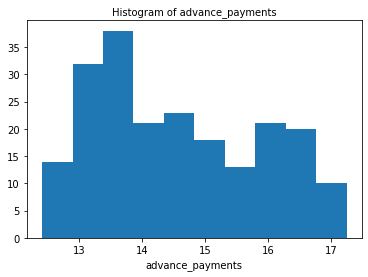

Description of probability_of_full_payment
----------------------------------------------------------------------------
count    210.000000
mean       0.870999
std        0.023629
min        0.808100
25%        0.856900
50%        0.873450
75%        0.887775
max        0.918300
Name: probability_of_full_payment, dtype: float64 Distribution of probability_of_full_payment
----------------------------------------------------------------------------


C:\Users\Athulya\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


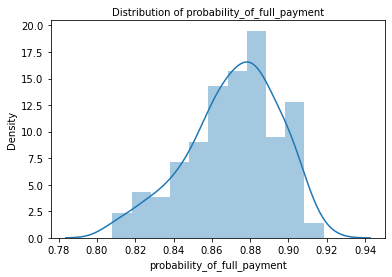

BoxPlot of probability_of_full_payment
----------------------------------------------------------------------------


C:\Users\Athulya\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


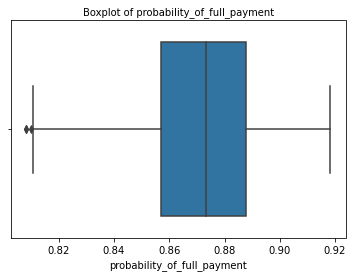

Histogram of probability_of_full_payment
----------------------------------------------------------------------------


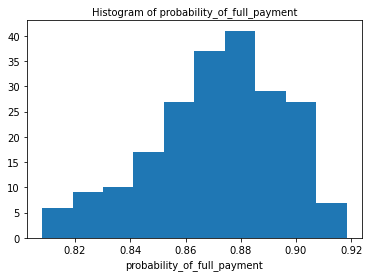

C:\Users\Athulya\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Description of current_balance
----------------------------------------------------------------------------
count    210.000000
mean       5.628533
std        0.443063
min        4.899000
25%        5.262250
50%        5.523500
75%        5.979750
max        6.675000
Name: current_balance, dtype: float64 Distribution of current_balance
----------------------------------------------------------------------------


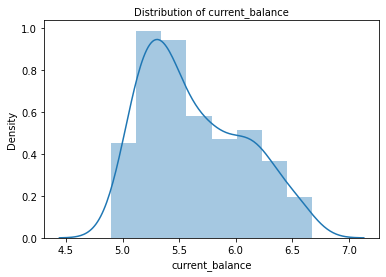

BoxPlot of current_balance
----------------------------------------------------------------------------


C:\Users\Athulya\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


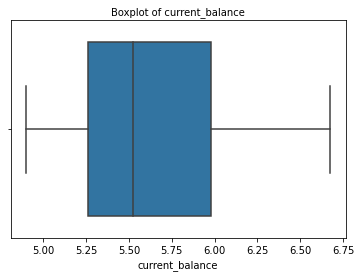

Histogram of current_balance
----------------------------------------------------------------------------


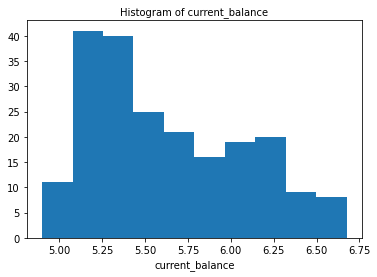

Description of credit_limit
----------------------------------------------------------------------------
count    210.000000
mean       3.258605
std        0.377714
min        2.630000
25%        2.944000
50%        3.237000
75%        3.561750
max        4.033000
Name: credit_limit, dtype: float64 Distribution of credit_limit
----------------------------------------------------------------------------


C:\Users\Athulya\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


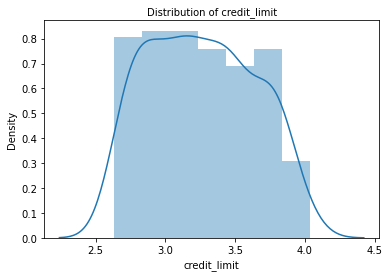

BoxPlot of credit_limit
----------------------------------------------------------------------------


C:\Users\Athulya\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


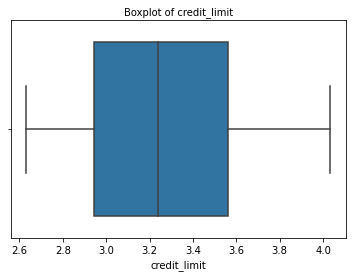

Histogram of credit_limit
----------------------------------------------------------------------------


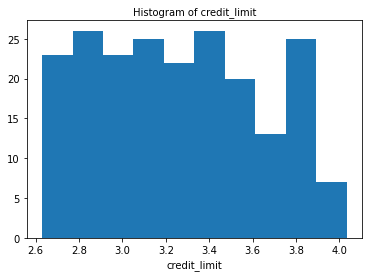

Description of min_payment_amt
----------------------------------------------------------------------------
count    210.000000
mean       3.700201
std        1.503557
min        0.765100
25%        2.561500
50%        3.599000
75%        4.768750
max        8.456000
Name: min_payment_amt, dtype: float64 Distribution of min_payment_amt
----------------------------------------------------------------------------


C:\Users\Athulya\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


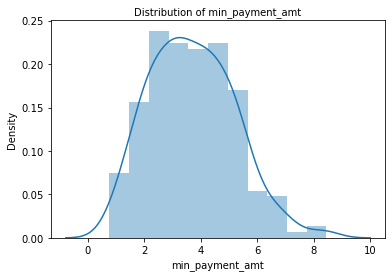

BoxPlot of min_payment_amt
----------------------------------------------------------------------------


C:\Users\Athulya\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


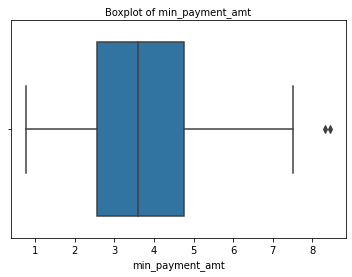

Histogram of min_payment_amt
----------------------------------------------------------------------------


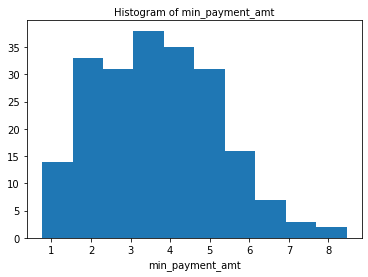

Description of max_spent_in_single_shopping
----------------------------------------------------------------------------
count    210.000000
mean       5.408071
std        0.491480
min        4.519000
25%        5.045000
50%        5.223000
75%        5.877000
max        6.550000
Name: max_spent_in_single_shopping, dtype: float64 Distribution of max_spent_in_single_shopping
----------------------------------------------------------------------------


C:\Users\Athulya\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


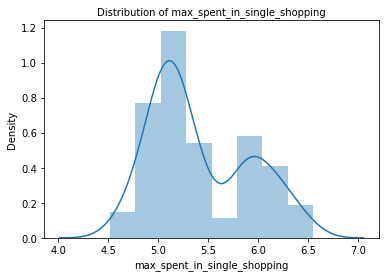

BoxPlot of max_spent_in_single_shopping
----------------------------------------------------------------------------


C:\Users\Athulya\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


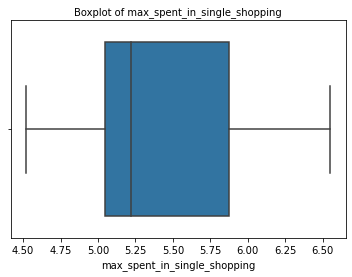

Histogram of max_spent_in_single_shopping
----------------------------------------------------------------------------


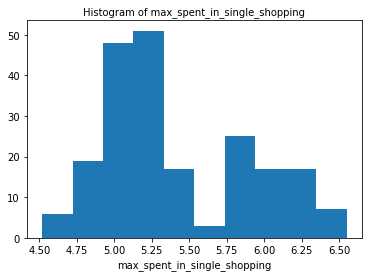

In [91]:
for x in lstnumericcolumns1:
    univariateAnalysis_numeric(x,7)

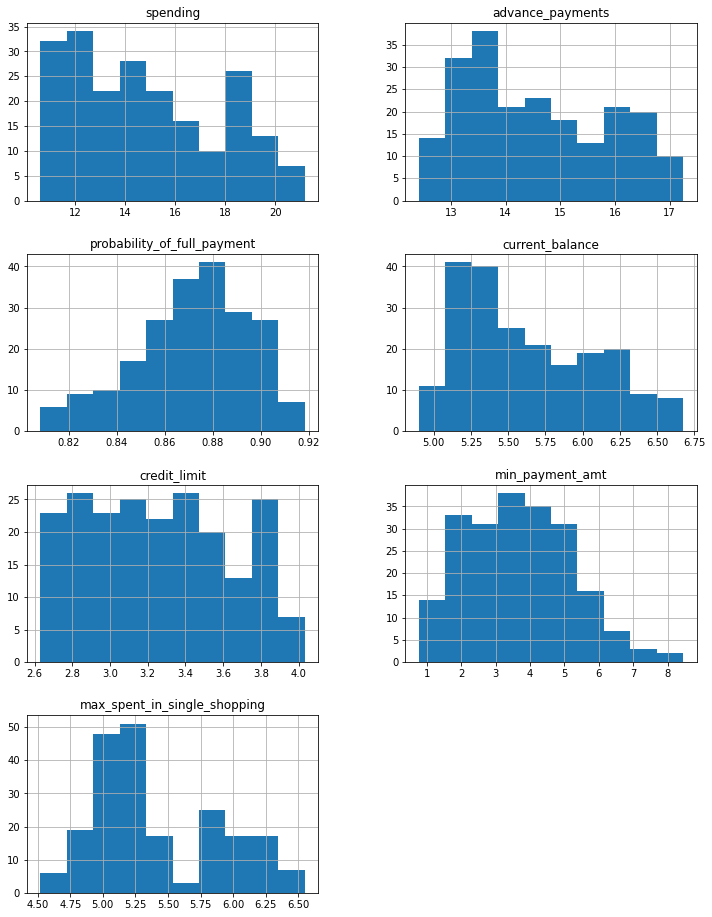

In [92]:
df1.hist(figsize=(12,16),layout=(4,2));

In [93]:
Bivariate Analysis

SyntaxError: invalid syntax (<ipython-input-93-726d010f4717>, line 1)

In [283]:
corr1 = df1_num.corr(method='pearson')
corr1

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
spending,1.000000,0.994341,0.608288,0.949985,0.970771,-0.229572,0.863693
advance_payments,0.994341,1.000000,0.529244,0.972422,0.944829,-0.217340,0.890784
probability_of_full_payment,0.608288,0.529244,1.000000,0.367915,0.761635,-0.331471,0.226825
current_balance,0.949985,0.972422,0.367915,1.000000,0.860415,-0.171562,0.932806
credit_limit,0.970771,0.944829,0.761635,0.860415,1.000000,-0.258037,0.749131
min_payment_amt,-0.229572,-0.217340,-0.331471,-0.171562,-0.258037,1.000000,-0.011079
max_spent_in_single_shopping,0.863693,0.890784,0.226825,0.932806,0.749131,-0.011079,1.000000


<AxesSubplot:>

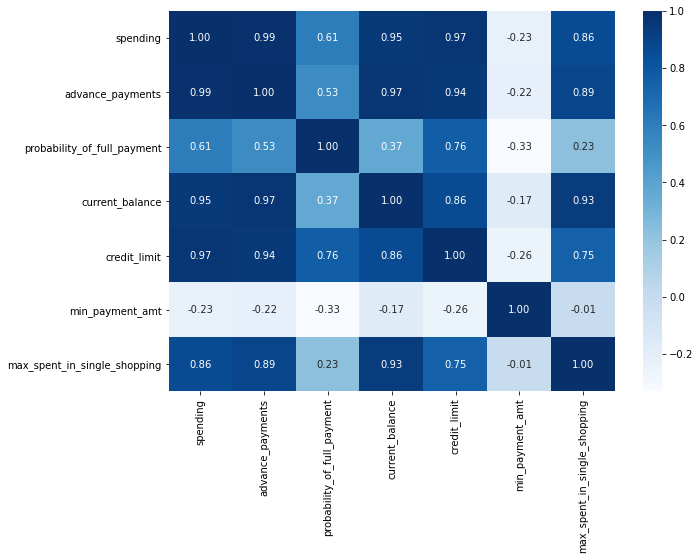

In [284]:
plt.figure(figsize=(10,7))
sns.heatmap(corr1, annot=True, fmt = '.2f', cmap="Blues")

Multivariate Analysis

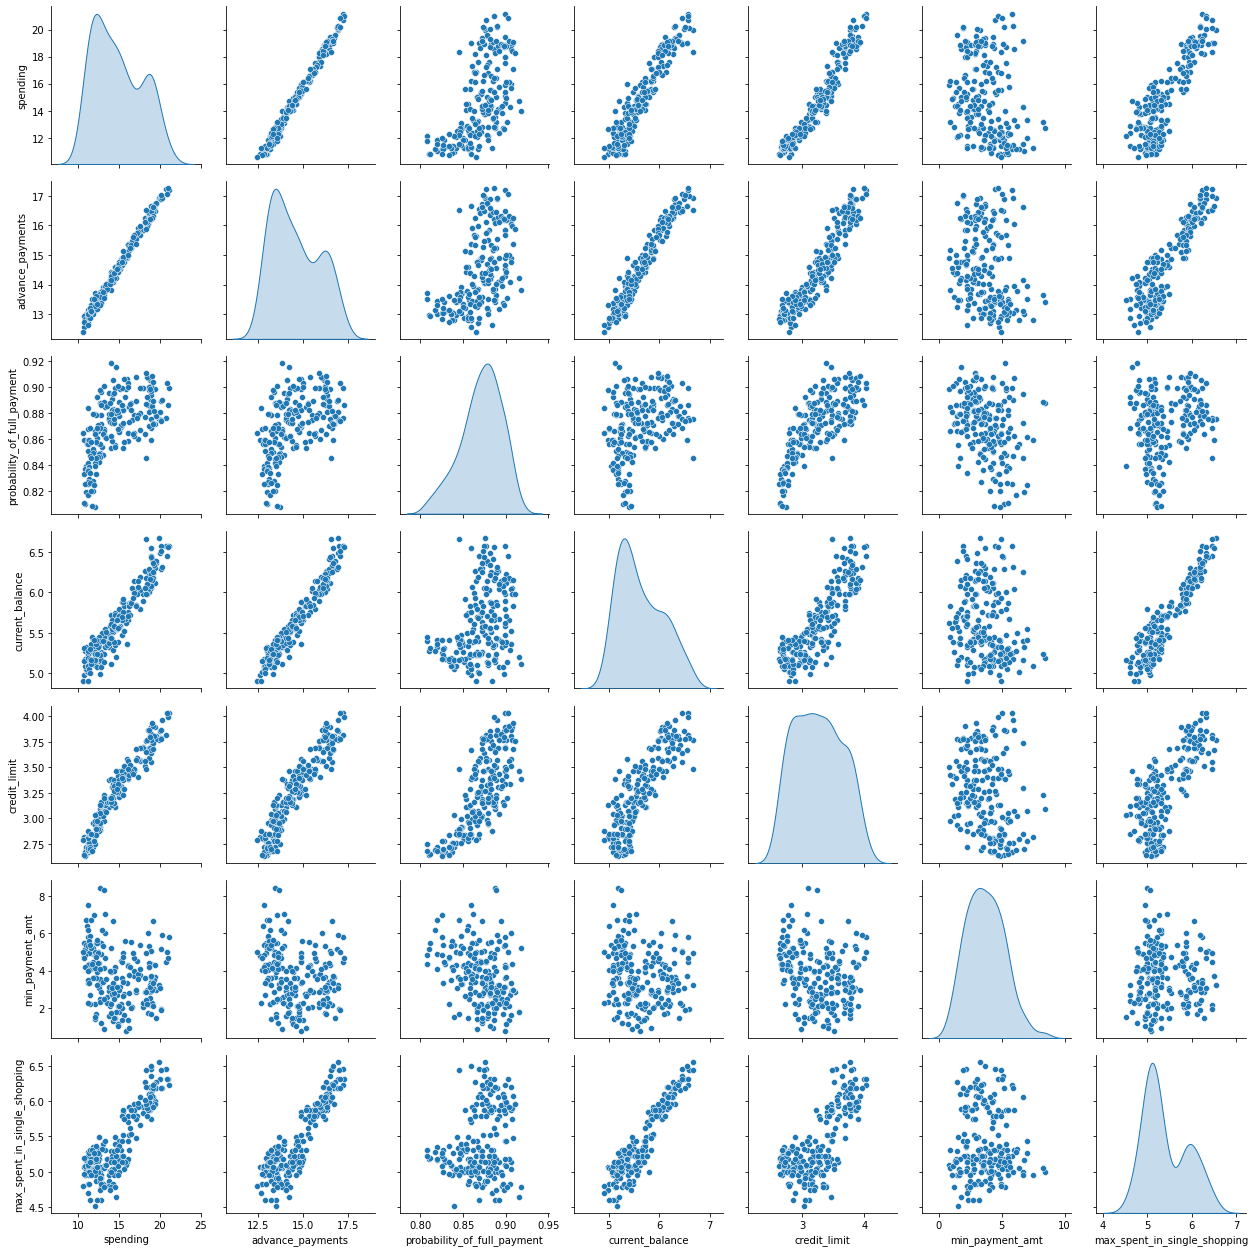

In [98]:
sns.pairplot(df1, diag_kind='kde')
plt.tight_layout()

1.2  Do you think scaling is necessary for clustering in this case? Justify

In [100]:
from sklearn.preprocessing import MinMaxScaler

In [101]:
scaler = MinMaxScaler().fit(df1)
df1_minmax = scaler.transform(df1)
df1_minmax = pd.DataFrame(df1_minmax,columns = df1.columns)
df1_minmax.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,0.882908,0.931818,0.608893,1.000000,0.807555,0.323356,1.000000
1,0.509915,0.512397,0.892015,0.261261,0.678546,0.334278,0.307730
2,0.789424,0.828512,0.678766,0.759572,0.801853,0.338439,0.802068
3,0.022663,0.113636,0.016334,0.213401,0.007840,0.574302,0.327917
4,0.698772,0.712810,0.826679,0.557995,0.758375,0.169408,0.648941


In [102]:
df1_minmax.describe().T

,count,mean,std,min,25%,50%,75%,max
spending,210.0,0.402032,0.274759,0.0,0.158640,0.355524,0.634089,1.0
advance_payments,210.0,0.444067,0.269826,0.0,0.214876,0.394628,0.682851,1.0
probability_of_full_payment,210.0,0.570767,0.214423,0.0,0.442831,0.593013,0.723004,1.0
current_balance,210.0,0.410773,0.249473,0.0,0.204533,0.351633,0.608530,1.0
credit_limit,210.0,0.448043,0.269219,0.0,0.223806,0.432644,0.664113,1.0
min_payment_amt,210.0,0.381633,0.195498,0.0,0.233575,0.368474,0.520570,1.0
max_spent_in_single_shopping,210.0,0.437751,0.241989,0.0,0.258986,0.346627,0.668636,1.0


In [103]:
from sklearn.preprocessing import StandardScaler

In [104]:
X = StandardScaler()
df1_scaled = pd.DataFrame(X.fit_transform(df1.iloc[:,0:7]),columns=df1.columns[0:])
df1_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
spending,210.0,9.148766e-16,1.002389,-1.466714,-0.887955,-0.169674,0.846599,2.181534
advance_payments,210.0,1.097006e-16,1.002389,-1.649686,-0.851433,-0.183664,0.887069,2.065260
probability_of_full_payment,210.0,1.243978e-15,1.002389,-2.668236,-0.598079,0.103993,0.711677,2.006586
current_balance,210.0,-1.089076e-16,1.002389,-1.650501,-0.828682,-0.237628,0.794595,2.367533
credit_limit,210.0,-2.994298e-16,1.002389,-1.668209,-0.834907,-0.057335,0.804496,2.055112
min_payment_amt,210.0,5.302637e-16,1.002389,-1.956769,-0.759148,-0.067469,0.712379,3.170590
max_spent_in_single_shopping,210.0,-1.935489e-15,1.002389,-1.813288,-0.740495,-0.377459,0.956394,2.328998


C:\Users\Athulya\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Athulya\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='spending', ylabel='Density'>

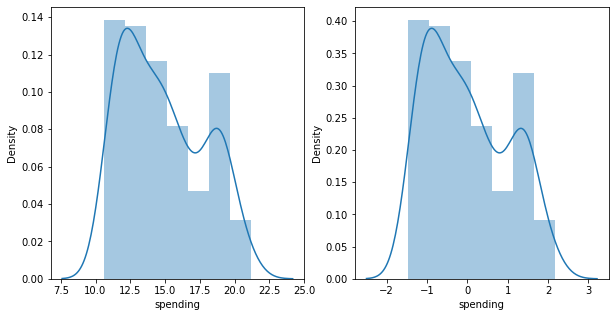

In [105]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(10, 5)
sns.distplot(df1['spending'] , ax=axes[0])
sns.distplot(df1_scaled['spending'] , ax=axes[1])

In [106]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
spending,210.0,14.847524,2.909699,10.5900,12.27000,14.35500,17.305000,21.1800
advance_payments,210.0,14.559286,1.305959,12.4100,13.45000,14.32000,15.715000,17.2500
probability_of_full_payment,210.0,0.870999,0.023629,0.8081,0.85690,0.87345,0.887775,0.9183
current_balance,210.0,5.628533,0.443063,4.8990,5.26225,5.52350,5.979750,6.6750
credit_limit,210.0,3.258605,0.377714,2.6300,2.94400,3.23700,3.561750,4.0330
min_payment_amt,210.0,3.700201,1.503557,0.7651,2.56150,3.59900,4.768750,8.4560
max_spent_in_single_shopping,210.0,5.408071,0.491480,4.5190,5.04500,5.22300,5.877000,6.5500


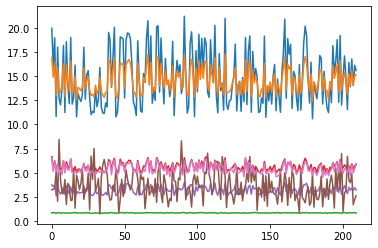

In [107]:
#before scaling
plt.plot(df1)
plt.show()

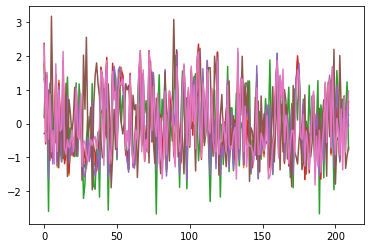

In [108]:
#after scaling
plt.plot(df1_scaled)
plt.show()

1.3 Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them

In [110]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [111]:
avglink = linkage (df1_scaled, method = 'average')

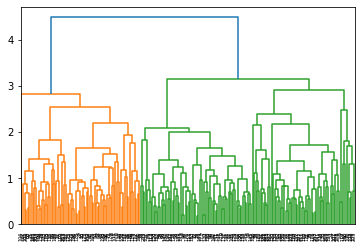

In [112]:
dend = dendrogram(avglink)

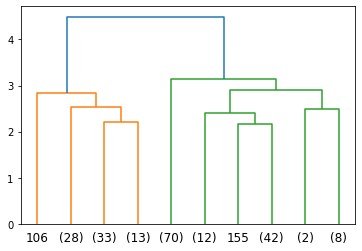

In [113]:
dend = dendrogram(avglink,
                 truncate_mode='lastp',
                 p = 10)

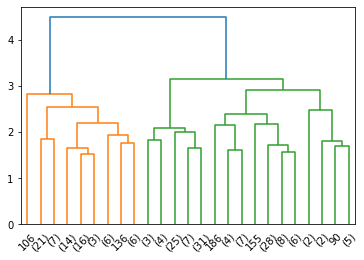

In [114]:
dend = dendrogram(avglink,
                 truncate_mode='lastp',
                 p = 25)

In [115]:
from scipy.cluster.hierarchy import fcluster

In [116]:
clusters3 = fcluster(avglink, 3, criterion = 'maxclust')

In [117]:
clusters3

array([1, 3, 1, 2, 1, 3, 2, 2, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 1, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 1, 1, 1,
       1, 3, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 3, 1, 3, 1, 3, 1, 1, 2, 3, 1,
       1, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 2, 2, 1, 2, 3, 2, 3, 2, 3, 1,
       3, 3, 2, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 2, 3, 2, 3, 1, 1, 1,
       3, 2, 3, 2, 3, 2, 3, 3, 1, 1, 3, 1, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 3, 3, 2, 1, 3, 1, 3, 3, 1], dtype=int32)

In [118]:
df1['clusters_avg'] = clusters3

In [119]:
df1.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters_avg
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1


In [120]:
df1['clusters_avg'].value_counts().sort_index()

1    75
2    70
3    65
Name: clusters_avg, dtype: int64

In [121]:
aggdata=df1.groupby('clusters_avg').mean()
aggdata['Freq']=df1['clusters_avg'].value_counts().sort_index()
aggdata

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Freq
clusters_avg,,,,,,,,
1,18.129200,16.058000,0.881595,6.135747,3.648120,3.650200,5.987040,75
2,11.916857,13.291000,0.846766,5.258300,2.846000,4.619000,5.115071,70
3,14.217077,14.195846,0.884869,5.442000,3.253508,2.768418,5.055569,65


Agglomerative method

In [123]:
df1_scaled.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.178230,2.367533,1.338579,-0.298806,2.328998
1,0.393582,0.253840,1.501773,-0.600744,0.858236,-0.242805,-0.538582
2,1.413300,1.428192,0.504874,1.401485,1.317348,-0.221471,1.509107
3,-1.384034,-1.227533,-2.591878,-0.793049,-1.639017,0.987884,-0.454961
4,1.082581,0.998364,1.196340,0.591544,1.155464,-1.088154,0.874813


In [124]:
from sklearn.cluster import AgglomerativeClustering

In [125]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')
Cluster_agglo=cluster.fit_predict(df1_scaled)
print(Cluster_agglo)

[1 0 1 2 1 0 2 2 1 2 1 1 2 1 0 0 0 2 2 2 2 2 1 2 0 1 0 2 2 2 2 2 2 0 2 2 2
 2 2 1 1 0 1 1 2 2 0 1 1 1 2 1 1 1 1 1 2 2 2 1 0 2 2 1 0 1 1 0 1 2 0 2 1 1
 2 1 0 2 1 0 0 0 0 1 2 1 1 1 1 0 0 1 0 2 2 1 1 1 2 1 0 1 0 1 0 1 1 2 0 1 1
 0 1 2 2 1 0 0 2 1 0 2 2 2 0 0 1 2 0 0 2 0 0 1 2 1 1 2 1 0 0 0 2 2 2 2 1 2
 0 2 0 2 0 1 0 0 2 2 0 1 1 2 1 1 1 2 1 0 0 2 0 2 0 1 1 1 0 2 0 2 0 2 0 0 1
 1 0 1 0 2 0 0 2 1 0 1 1 2 1 2 0 0 0 2 1 0 1 0 0 1]


In [126]:
df1["clusters_agglo"]=Cluster_agglo

In [127]:
df1.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters_avg,clusters_agglo
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3,0
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2,2
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1,1


In [128]:
agglo_data=df1.drop(["clusters_avg"],axis=1).groupby('clusters_agglo').mean()
agglo_data['Freq']=df1.clusters_agglo.value_counts().sort_index()
agglo_data

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Freq
clusters_agglo,,,,,,,,
0,14.217077,14.195846,0.884869,5.442000,3.253508,2.768418,5.055569,65
1,18.129200,16.058000,0.881595,6.135747,3.648120,3.650200,5.987040,75
2,11.916857,13.291000,0.846766,5.258300,2.846000,4.619000,5.115071,70


1.4 Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and silhouette score. Explain the results properly. Interpret and write inferences on the finalized clusters.



Creating Clusters using KMeans

In [129]:
from sklearn.cluster import KMeans 

In [130]:
k_means = KMeans(n_clusters = 1,random_state=1)
k_means.fit(df1_scaled)
k_means.inertia_

1469.9999999999995

In [131]:
k_means = KMeans(n_clusters = 2,random_state=1)
k_means.fit(df1_scaled)
k_means.inertia_

659.1717544870411

In [132]:
k_means = KMeans(n_clusters = 3,random_state=1)
k_means.fit(df1_scaled)
k_means.inertia_

430.65897315130064

In [133]:
k_means = KMeans(n_clusters = 4,random_state=1)
k_means.fit(df1_scaled)
k_means.inertia_

371.38509060801107

In [134]:
k_means = KMeans(n_clusters = 5,random_state=1)
k_means.fit(df1_scaled)
k_means.inertia_

327.2127816566134

In [135]:
k_means = KMeans(n_clusters = 6,random_state=1)
k_means.fit(df1_scaled)
k_means.inertia_

289.315995389595

WSS reduces as K keeps increasing

In [136]:
wss = []

In [137]:
    for i in range(1,11):
        KM = KMeans(n_clusters=i, random_state=1)
        KM.fit(df1_scaled)
        wss.append(KM.inertia_)

In [138]:
wss

[1469.9999999999995,
 659.1717544870411,
 430.65897315130064,
 371.38509060801107,
 327.2127816566134,
 289.315995389595,
 262.98186570162267,
 241.8189465608603,
 223.91254221002728,
 206.3961218478669]

Elbow curve

C:\Users\Athulya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Elbow curve'}, xlabel='Clusters', ylabel='Inertia in the cluster'>

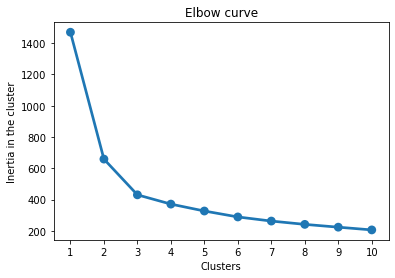

In [139]:
a=[1,2,3,4,5,6,7,8,9,10]
plt.title('Elbow curve')
plt.xlabel("Clusters")
plt.ylabel("Inertia in the cluster")
sns.pointplot(a, wss)

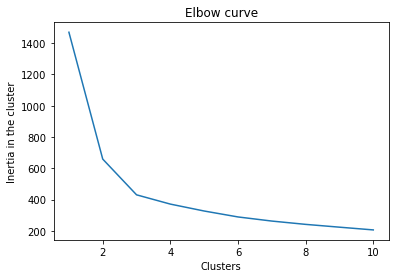

In [140]:
plt.plot(range(1,11), wss)
plt.title('Elbow curve')
plt.xlabel("Clusters")
plt.ylabel("Inertia in the cluster")
plt.show()

Silhouette score

In [141]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [142]:
k_means = KMeans(n_clusters = 3,random_state=1)
k_means.fit(df1_scaled)
labels3 = k_means.labels_

In [143]:
silhouette_score(df1_scaled, labels3, random_state=1)

0.40072705527512986

In [144]:
k_means = KMeans(n_clusters = 4,random_state=1)
k_means.fit(df1_scaled)
labels4 = k_means.labels_

In [145]:
silhouette_score(df1_scaled, labels4, random_state=1)

0.3276547677266192

In [146]:
df1["clusters_kmeans"] = labels3
df1.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters_avg,clusters_agglo,clusters_kmeans
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1,1,2
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3,0,0
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1,1,2
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2,2,1
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1,1,2


In [147]:
kmeans_data=df1.drop(["clusters_avg","clusters_agglo"],axis=1)

In [148]:
kmeans_data.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters_kmeans
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,2
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,0
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,2
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,1
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,2


In [149]:
kmeans_data.clusters_kmeans.value_counts().sort_index()

0    71
1    72
2    67
Name: clusters_kmeans, dtype: int64

In [150]:
kmeans_data.groupby('clusters_kmeans').mean()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
clusters_kmeans,,,,,,,
0,14.437887,14.337746,0.881597,5.514577,3.259225,2.707341,5.120803
1,11.856944,13.247778,0.848253,5.231750,2.849542,4.742389,5.101722
2,18.495373,16.203433,0.884210,6.175687,3.697537,3.632373,6.041701


In [151]:
sil_width = silhouette_samples(df1_scaled, labels3)

In [152]:
df1["sil_width"] = sil_width

In [153]:
df1.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters_avg,clusters_agglo,clusters_kmeans,sil_width
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1,1,2,0.573699
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3,0,0,0.366386
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1,1,2,0.637784
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2,2,1,0.512458
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1,1,2,0.362276


In [154]:
silhouette_samples(df1_scaled, labels3).min()

0.002713089347678376

In [155]:
from sklearn.decomposition import PCA

C:\Users\Athulya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


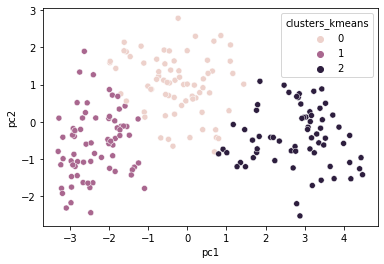

In [156]:
pcamodel= PCA(2)
pca_data = pcamodel.fit_transform(df1_scaled)
pca_data = pd.DataFrame(pca_data, columns=['pc1','pc2'])

sns.scatterplot(pca_data.pc1, pca_data.pc2, hue = kmeans_data.clusters_kmeans);

In [157]:
kmeans_data.groupby('clusters_kmeans').mean().T

clusters_kmeans,0,1,2
spending,14.437887,11.856944,18.495373
advance_payments,14.337746,13.247778,16.203433
probability_of_full_payment,0.881597,0.848253,0.884210
current_balance,5.514577,5.231750,6.175687
credit_limit,3.259225,2.849542,3.697537
min_payment_amt,2.707341,4.742389,3.632373
max_spent_in_single_shopping,5.120803,5.101722,6.041701


1.5 Describe cluster profiles for the clusters defined. Recommend different promotional strategies for different clusters.



In [ ]:
Problem 1: Clustering

A leading bank wants to develop a customer segmentation to give promotional offers to its customers. They collected a sample that summarizes the activities of users during the past few months. You are given the task to identify the segments based on credit card usage.



import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats

df1 = pd.read_csv('bank_marketing_part1_Data.csv')

1.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).



df1.head()

df1.info()

df1.dtypes

df1.shape

df1.isnull().sum()

df1.describe()

df1.duplicated().sum()

Univariate Analysis

plt.figure(figsize=(15,8))
plt.title("Boxplot containing entire data")
sns.boxplot(data=df1,orient="h");

def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df1[column].describe(),end=' ')
    
    
    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.distplot(df1[column], kde=True);
    plt.title("Distribution of " + column,fontsize=10)
    plt.show()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=df1[column], orient = "v")
    plt.title("Boxplot of " + column,fontsize=10)
    plt.show()
    
    plt.figure()
    print("Histogram of " + column)
    print("----------------------------------------------------------------------------")
    ax1 = plt.hist(x=df1[column])
    plt.title("Histogram of " + column,fontsize=10)
    plt.xlabel("" + column, fontsize=10)
    plt.show()

df1_num = df1.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns1 = list(df1_num.columns.values)
len(lstnumericcolumns1)

df1_num.head()

df1.skew(axis = 0, skipna = True).sort_values(ascending=False)

Skewness_1 = pd.DataFrame({'Skewness' : [stats.skew(df1.spending),stats.skew(df1.advance_payments),stats.skew(df1.probability_of_full_payment),stats.skew(df1.current_balance),stats.skew(df1.credit_limit),stats.skew(df1.min_payment_amt),stats.skew(df1.max_spent_in_single_shopping)]},
                        index=['spending','advance_payments','probability_of_full_payment','current_balance','credit_limit','min_payment_amt','max_spent_in_single_shopping']) 

Skewness_1

for x in lstnumericcolumns1:
    univariateAnalysis_numeric(x,7)

df1.hist(figsize=(12,16),layout=(4,2));

Bivariate Analysis

corr1 = df1_num.corr(method='pearson')
corr1

plt.figure(figsize=(10,7))
sns.heatmap(corr1, annot=True, fmt = '.2f', cmap="Blues")

Multivariate Analysis

sns.pairplot(df1, diag_kind='kde')
plt.tight_layout()

1.2  Do you think scaling is necessary for clustering in this case? Justify

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(df1)
df1_minmax = scaler.transform(df1)
df1_minmax = pd.DataFrame(df1_minmax,columns = df1.columns)
df1_minmax.head()

df1_minmax.describe().T

from sklearn.preprocessing import StandardScaler

X = StandardScaler()
df1_scaled = pd.DataFrame(X.fit_transform(df1.iloc[:,0:7]),columns=df1.columns[0:])
df1_scaled.describe().T

fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(10, 5)
sns.distplot(df1['spending'] , ax=axes[0])
sns.distplot(df1_scaled['spending'] , ax=axes[1])

df1.describe().T

#before scaling
plt.plot(df1)
plt.show()

#after scaling
plt.plot(df1_scaled)
plt.show()

1.3 Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them

from scipy.cluster.hierarchy import dendrogram, linkage

avglink = linkage (df1_scaled, method = 'average')

dend = dendrogram(avglink)

dend = dendrogram(avglink,
                 truncate_mode='lastp',
                 p = 10)

dend = dendrogram(avglink,
                 truncate_mode='lastp',
                 p = 25)

from scipy.cluster.hierarchy import fcluster

clusters3 = fcluster(avglink, 3, criterion = 'maxclust')

clusters3

df1['clusters_avg'] = clusters3

df1.head()

df1['clusters_avg'].value_counts().sort_index()

aggdata=df1.groupby('clusters_avg').mean()
aggdata['Freq']=df1['clusters_avg'].value_counts().sort_index()
aggdata

Agglomerative method

df1_scaled.head()

from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')
Cluster_agglo=cluster.fit_predict(df1_scaled)
print(Cluster_agglo)

df1["clusters_agglo"]=Cluster_agglo

df1.head()

agglo_data=df1.drop(["clusters_avg"],axis=1).groupby('clusters_agglo').mean()
agglo_data['Freq']=df1.clusters_agglo.value_counts().sort_index()
agglo_data

1.4 Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and silhouette score. Explain the results properly. Interpret and write inferences on the finalized clusters.



Creating Clusters using KMeans

from sklearn.cluster import KMeans 

k_means = KMeans(n_clusters = 1,random_state=1)
k_means.fit(df1_scaled)
k_means.inertia_

k_means = KMeans(n_clusters = 2,random_state=1)
k_means.fit(df1_scaled)
k_means.inertia_

k_means = KMeans(n_clusters = 3,random_state=1)
k_means.fit(df1_scaled)
k_means.inertia_

k_means = KMeans(n_clusters = 4,random_state=1)
k_means.fit(df1_scaled)
k_means.inertia_

k_means = KMeans(n_clusters = 5,random_state=1)
k_means.fit(df1_scaled)
k_means.inertia_

k_means = KMeans(n_clusters = 6,random_state=1)
k_means.fit(df1_scaled)
k_means.inertia_

WSS reduces as K keeps increasing

wss = []

    for i in range(1,11):
        KM = KMeans(n_clusters=i, random_state=1)
        KM.fit(df1_scaled)
        wss.append(KM.inertia_)

wss

Elbow curve

a=[1,2,3,4,5,6,7,8,9,10]
plt.title('Elbow curve')
plt.xlabel("Clusters")
plt.ylabel("Inertia in the cluster")
sns.pointplot(a, wss)

plt.plot(range(1,11), wss)
plt.title('Elbow curve')
plt.xlabel("Clusters")
plt.ylabel("Inertia in the cluster")
plt.show()

Silhouette score

from sklearn.metrics import silhouette_samples, silhouette_score

k_means = KMeans(n_clusters = 3,random_state=1)
k_means.fit(df1_scaled)
labels3 = k_means.labels_

silhouette_score(df1_scaled, labels3, random_state=1)

k_means = KMeans(n_clusters = 4,random_state=1)
k_means.fit(df1_scaled)
labels4 = k_means.labels_

silhouette_score(df1_scaled, labels4, random_state=1)

df1["clusters_kmeans"] = labels3
df1.head()

kmeans_data=df1.drop(["clusters_avg","clusters_agglo"],axis=1)

kmeans_data.head()

kmeans_data.clusters_kmeans.value_counts().sort_index()

kmeans_data.groupby('clusters_kmeans').mean()

sil_width = silhouette_samples(df1_scaled, labels3)

df1["sil_width"] = sil_width

df1.head()

silhouette_samples(df1_scaled, labels3).min()

from sklearn.decomposition import PCA

pcamodel= PCA(2)
pca_data = pcamodel.fit_transform(df1_scaled)
pca_data = pd.DataFrame(pca_data, columns=['pc1','pc2'])

sns.scatterplot(pca_data.pc1, pca_data.pc2, hue = kmeans_data.clusters_kmeans);

kmeans_data.groupby('clusters_kmeans').mean().T

1.5 Describe cluster profiles for the clusters defined. Recommend different promotional strategies for different clusters.



